<a href="https://colab.research.google.com/github/glycodynamics/BME370/blob/main/Example1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

** Hypothesis Testing**
This notebook demonstrates various hypothesis testing techniques including t-tests, chi-squared tests, and regression analysis. Dataset links are provided for ease of access.

---



In [32]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp
from scipy.stats import ttest_ind

In [35]:
data = pd.read_csv("https://raw.githubusercontent.com/glycodynamics/BME370/refs/heads/main/data/diabetes.csv")
data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


#
**1. One-Sample t-test**

H₀: μ = 100       (Mean glucose is 100)

Hₐ: μ ≠ 100       (Mean glucose is not 100)

In [37]:
# Perform one-sample t-test on the entire Glucose column
t_stat, p_value = ttest_1samp(data['Glucose'].dropna(), popmean=100)
print(f"One-sample t-test:\nt = {t_stat:.3f}, p = {p_value:.3f}")

One-sample t-test:
t = 18.111, p = 0.000


t = 18.111 → This is a very large t-statistic, which suggests your sample mean is far away from 100.

p = 0.000 → This is shorthand for p < 0.0005, meaning the result is highly statistically significant.

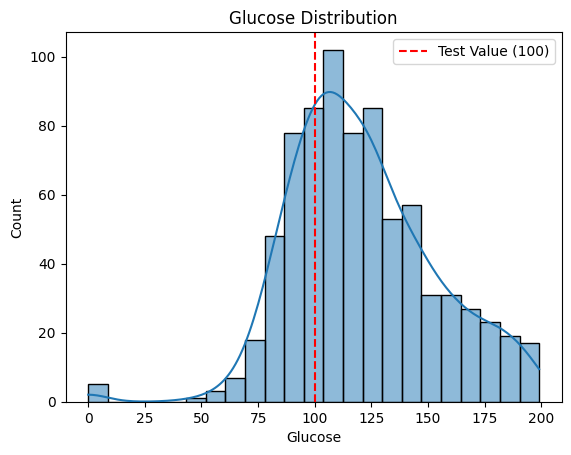

120.89453125


In [48]:
sns.histplot(data['Glucose'].dropna(), kde=True)
plt.axvline(100, color='red', linestyle='--', label='Test Value (100)')
plt.title('Glucose Distribution')
plt.legend()
plt.show()

print(data['Glucose'].mean())


**Independent Two-Sample t-test**

This is a two-sample t-test, so the hypotheses are:

**Null Hypothesis ($H_0$)**: The mean glucose level of diabetic individuals is equal to that of non-diabetic individuals.

$\mu_{\text{diabetic}} \ = \mu_{\text   {non-diabetic}}$

**Alternative Hypothesis ($H_A$)**: The mean glucose level of diabetic individuals is not equal to that of non-diabetic individuals.

$\mu_{\text{diabetic}} \ne \mu_{\text   {non-diabetic}}$

This is a two-tailed!

In [27]:
diabetic = data[data['Outcome'] == 1]
non_diabetic = data[data['Outcome'] == 0]
non_diabetic

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
1,1,85,66,29,0,26.6,0.351,31,0
3,1,89,66,23,94,28.1,0.167,21,0
5,5,116,74,0,0,25.6,0.201,30,0
7,10,115,0,0,0,35.3,0.134,29,0
10,4,110,92,0,0,37.6,0.191,30,0
...,...,...,...,...,...,...,...,...,...
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0


In [26]:
t_statistic, p_value = ttest_ind(diabetic['Glucose'], non_diabetic['Glucose'])
print(f"T-statistic: {t_statistic}")
print(f"P-value: {p_value}")

T-statistic: 14.600060005973894
P-value: 8.935431645289912e-43


**Statistical Significance**:
The p-value is extremely small (way below any common threshold like 0.05, 0.01, or even 0.001). So, we reject the null hypothesis.

**Conclusion:**
There is strong statistical evidence that the mean glucose level of diabetic individuals is different from that of non-diabetic individuals.

*Glucose levels are significantly higher in people with diabetes compared to those without*

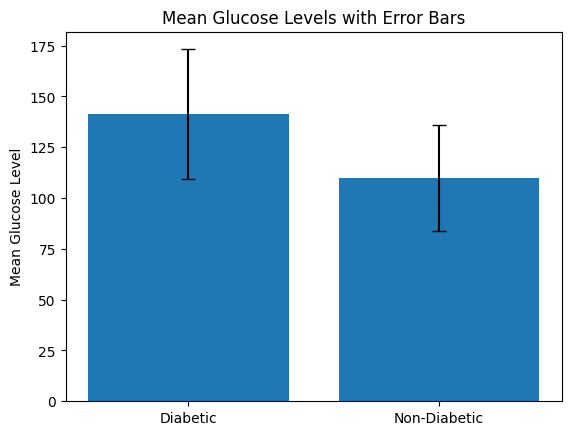

In [29]:
# Plot mean glucose levels with error bars
means = [diabetic['Glucose'].mean(), non_diabetic['Glucose'].mean()]
stds = [diabetic['Glucose'].std(), non_diabetic['Glucose'].std()]
labels = ['Diabetic', 'Non-Diabetic']
plt.bar(labels, means, yerr=stds, capsize=5)
plt.ylabel('Mean Glucose Level')
plt.title('Mean Glucose Levels with Error Bars')
plt.show()
